In [3]:
pip install kaggle

In [0]:
from google.colab import files
import os

In [5]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

User uploaded file "kaggle.json" with length 65 bytes
kaggle.json


In [7]:
!kaggle datasets download -d drscarlat/melanoma 
#downloading the dataset from kaggle

100% 5.24G/5.26G [01:17<00:00, 97.9MB/s]
100% 5.26G/5.26G [01:18<00:00, 72.3MB/s]


In [8]:
os.listdir()

['.config', 'melanoma.zip', 'kaggle.json', 'sample_data']

In [9]:
!unzip melanoma.zip

Streaming output truncated to the last 5000 lines.
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031355.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031357.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031358.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031362.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031363.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031365.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031366.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031367.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031370.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031375.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031380.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031382.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031383.jpg  
  inflating: dermmel/DermMel/train_sep/

In [0]:
import cv2

In [0]:
img = cv2.imread('dermmel/DermMel/valid/Melanoma/AUGmented_0_8513.jpeg')

In [0]:
import matplotlib.pyplot as plty

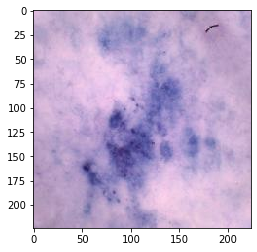

In [5]:
plty.imshow(img)

Training the Melanoma and  Non-Melanoma

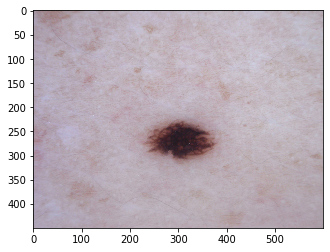

In [6]:

img = cv2.imread('dermmel/DermMel/valid/NotMelanoma/ISIC_0034308.jpg')[:,:,::-1]
plty.imshow(img)

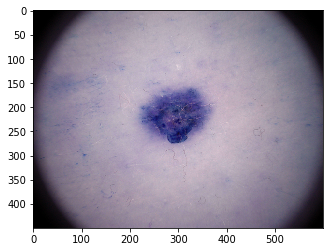

In [7]:
img = cv2.imread('dermmel/DermMel/valid/NotMelanoma/ISIC_0034088.jpg')
plty.imshow(img)

In [8]:
import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [0]:
length = 100

In [0]:
#getting the data of Melanoma and Non-Melanoma from 0 to 100
MIN = 0
MAX =3000

In [0]:
train_melanoma = os.listdir("dermmel/DermMel/train_sep/Melanoma/")[MIN:MAX]
train_non_melanoma = os.listdir("dermmel/DermMel/train_sep/NotMelanoma")[MIN:MAX]

In [0]:
train_images = train_melanoma+train_non_melanoma

In [15]:
print("Total number of Train images are ==> {train}".format(train=len(train_images)),
      "Melamoma and Non-Melanoma are {M} and {N_M}".format(M=len(train_melanoma),N_M=len(train_non_melanoma)),sep='\n')

Total number of Train images are ==> 6000
Melamoma and Non-Melanoma are 3000 and 3000


In [16]:
images = []
foramts = 'pngjpgjpeg'
count = 0
for index,i in enumerate(train_images):
  print("processing images# {}".format(count+1))
  if index < len(train_images)/2:
    if 'jpg' in i or 'jpeg' in i or 'png' and i:
      count+=1
      img = cv2.imread('dermmel/DermMel/train_sep/Melanoma/'+i)
      imgx = cv2.resize(img,(300,300))
      images.append(imgx)
  elif index >= len(train_images)/2:
    if 'jpg' in i or 'jpeg' in i or 'png' in i:
      count+=1
      img = cv2.imread('dermmel/DermMel/train_sep/NotMelanoma/'+i)
      imgx = cv2.resize(img,(300,300))
      images.append(imgx)
  

Streaming output truncated to the last 5000 lines.
processing images# 1002
processing images# 1003
processing images# 1004
processing images# 1005
processing images# 1006
processing images# 1007
processing images# 1008
processing images# 1009
processing images# 1010
processing images# 1011
processing images# 1012
processing images# 1013
processing images# 1014
processing images# 1015
processing images# 1016
processing images# 1017
processing images# 1018
processing images# 1019
processing images# 1020
processing images# 1021
processing images# 1022
processing images# 1023
processing images# 1024
processing images# 1025
processing images# 1026
processing images# 1027
processing images# 1028
processing images# 1029
processing images# 1030
processing images# 1031
processing images# 1032
processing images# 1033
processing images# 1034
processing images# 1035
processing images# 1036
processing images# 1037
processing images# 1038
processing images# 1039
processing images# 1040
processing im

In [17]:
i,index, i in train_non_melanoma, i in train_melanoma,(MAX/2)

('ISIC_0024380.jpg', 5999, True, False, 1500.0)

In [0]:
labels = []
for i in range(len(train_images)):
  if i <len(train_images)/2:
    labels.append(0) # for melanoma
  elif i >= len(train_images)/2:
    labels.append(1) # for non-melanoma
  

In [0]:
import numpy as np
numpy_train_images = np.array(images)

In [20]:
numpy_train_images.shape

(6000, 300, 300, 3)

In [0]:
from keras.utils import to_categorical
hot_enc_labels = to_categorical(labels)

In [22]:
hot_enc_labels.shape

(6000, 2)

In [0]:
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout,Dense,Flatten

In [0]:
def BaseLine():
  model = Sequential()
  model.add(layers.Conv2D(224,(3,3),activation='relu',input_shape=(300,300,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(230,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(112,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(112,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(56,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  return model

In [25]:
model = BaseLine()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 224)     6272      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 224)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 230)     463910    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 230)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 112)       231952    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 112)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 112)      

In [27]:
model.fit(numpy_train_images,hot_enc_labels,epochs=10,batch_size=1)




Epoch 1/10





6000/6000 [==============================] - 4807s 801ms/step - loss: 8.0447 - acc: 0.5001
Epoch 2/10
6000/6000 [==============================] - 4807s 801ms/step - loss: 8.0318 - acc: 0.5002
Epoch 3/10
 694/6000 [==>...........................] - ETA: 1:10:22 - loss: 8.0055 - acc: 0.5022

KeyboardInterrupt: ignored

In [0]:

len(train_melanoma)

In [0]:
len(train_non_melanoma)

In [0]:
len(train_images)

In [0]:
5341+5341

In [0]:
formats = ['jpg','png','jpeg']
'jpeg' in i

In [0]:
i

In [0]:
count

In [0]:
index

In [0]:
i,train_melanoma[-1],train_non_melanoma[0]

In [0]:
model.save("3000_2epochs.h5")